In [3]:
import numpy as np
import pandas as pd

데이터 분포 확인
불균형한 데이터 분포(왜도, 첨도 확인) -> scaling
클래스 10가지 -> 5가지 줄이기

# 모델 :feature -> target(Review)
# _______
24_Hour_Peak, All_time_peak

In [4]:
path = r"C:\Users\NT550009\Desktop\ASAC_ml_project\web_crawling\merge_dataset\raw_merge.csv"
raw = pd.read_csv(path, sep = '\t')
raw.head()

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive


In [5]:
raw.tail()

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative
46251,1563130,4,97,117,987,0,0,0,0,29.99,...,0,1.0,0.0,0.0,1.0,897.0,35.0,2022-10-07,224,Overwhelmingly Negative


In [6]:
len(raw) # 46252 개

46252

In [7]:
raw.shape

(46252, 28)

In [8]:
# 컬럼 확인
raw.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative',
       'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks',
       'price', 'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic', 'metacritic_tf', 'windows',
       'mac', 'linux', 'platforms_num', 'recommendations', 'achievements',
       'new_date', 'days_after_release', 'Review'],
      dtype='object')

In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               46252 non-null  int64  
 1   24_Hour_Peak        46252 non-null  int64  
 2   All_time_peak       46252 non-null  int64  
 3   positive            46252 non-null  int64  
 4   negative            46252 non-null  int64  
 5   average_forever     46252 non-null  int64  
 6   average_2weeks      46252 non-null  int64  
 7   median_forever      46252 non-null  int64  
 8   median_2weeks       46252 non-null  int64  
 9   price               46252 non-null  float64
 10  initialprice        46252 non-null  float64
 11  genre               46252 non-null  object 
 12  num_lang            46252 non-null  int64  
 13  required_age        46252 non-null  float64
 14  is_free             46252 non-null  int64  
 15  controller_support  46252 non-null  int64  
 16  dlc 

In [10]:
raw["metacritic_tf"] # metacritic_tf : metacritic 존재 여부 1, 0

0        1
1        0
2        1
3        1
4        1
        ..
46247    0
46248    0
46249    0
46250    0
46251    0
Name: metacritic_tf, Length: 46252, dtype: int64

# 1. Metacritic 유무에 따른 관계?

In [11]:
metacritic_T_df = raw[raw['metacritic_tf'] ==1]

In [12]:
metacritic_T_df

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
0,294100,20930,60742,157344,3038,12492,1401,5368,921,34.99,...,1,1.0,1.0,1.0,3.0,134967.0,0.0,2018-10-17,1675,Overwhelmingly Positive
2,504230,1234,4148,71428,1686,1316,310,370,582,19.99,...,1,1.0,1.0,1.0,3.0,66397.0,32.0,2018-01-25,1940,Overwhelmingly Positive
3,588650,4553,14880,128085,3722,1841,183,868,213,14.99,...,1,1.0,1.0,1.0,3.0,113184.0,121.0,2018-08-06,1747,Overwhelmingly Positive
4,264710,4205,50876,221972,7800,1943,313,941,277,29.99,...,1,1.0,1.0,0.0,2.0,208334.0,17.0,2018-01-24,1941,Overwhelmingly Positive
5,519860,78,557,18037,430,309,0,254,0,19.99,...,1,1.0,1.0,1.0,3.0,16289.0,30.0,2018-12-10,1621,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44164,581660,14,208,590,480,85,14,37,14,19.99,...,1,1.0,0.0,0.0,1.0,888.0,36.0,2022-01-10,494,Mixed
44443,2013300,0,0,101,88,0,0,0,0,9.99,...,1,1.0,0.0,0.0,1.0,168.0,16.0,2022-06-15,338,Mixed
44543,957710,1,143,224,216,56,0,56,0,34.99,...,1,1.0,0.0,0.0,1.0,344.0,107.0,2022-02-02,471,Mixed
45028,2062120,11,315,0,0,28,0,40,0,0.00,...,1,1.0,0.0,0.0,1.0,0.0,12.0,2022-10-20,211,Mixed


In [13]:
len(metacritic_T_df)

1247

In [14]:
metacritic_F_df = raw[raw['metacritic_tf'] ==0]

In [15]:
metacritic_F_df 

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
1,960090,13428,53891,246979,6441,4018,277,1532,62,13.99,...,0,1.0,1.0,0.0,2.0,222889.0,146.0,2018-12-18,1613,Overwhelmingly Positive
6,531510,89,918,16470,379,726,60,307,60,19.99,...,0,1.0,1.0,1.0,3.0,15512.0,26.0,2018-05-31,1814,Overwhelmingly Positive
8,432350,72,2631,4585,57,16761,0,29848,0,24.99,...,0,1.0,0.0,0.0,1.0,4275.0,133.0,2018-11-30,1631,Very Positive
9,629730,1024,10235,40144,1342,1182,85,454,106,19.99,...,0,1.0,0.0,0.0,1.0,39518.0,0.0,2018-12-11,1620,Overwhelmingly Positive
10,617670,30,711,10555,265,380,0,102,0,1.99,...,0,1.0,0.0,0.0,1.0,11204.0,800.0,2018-11-15,1646,Overwhelmingly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46247,1995280,0,0,0,0,0,0,0,0,14.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-12-02,168,Negative
46248,2098860,0,0,0,11,0,0,0,0,9.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-08-09,283,Negative
46249,2154770,814,1176,0,0,0,0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,2022-12-01,169,Very Negative
46250,1915410,0,1,0,16,0,0,0,0,2.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2022-04-26,388,Negative


In [16]:
len(metacritic_F_df )

45005

In [17]:
raw.describe()

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,dlc,metacritic,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,days_after_release
count,4.625200e+04,46252.000000,4.625200e+04,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,...,46252.000000,1247.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000,46252.000000
mean,1.345554e+06,68.137118,6.508497e+02,749.455569,132.672295,109.782993,7.580429,97.879767,8.404004,6.958805,...,0.478985,74.289495,0.026961,0.991049,0.179646,0.119454,1.290150,621.876567,20.804008,954.674933
std,4.408797e+05,2705.008916,1.324747e+04,10388.907605,2057.176731,1337.555910,137.046019,1365.108579,151.662843,11.092962,...,4.621223,9.463306,0.161971,0.094186,0.383897,0.324326,0.629093,9089.433998,173.362171,529.189863
min,1.313000e+03,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
25%,9.872250e+05,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,...,0.000000,69.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,496.000000
50%,1.321115e+06,0.000000,0.000000e+00,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.990000,...,0.000000,76.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.000000,898.000000
75%,1.695632e+06,0.000000,4.000000e+00,45.000000,12.000000,0.000000,0.000000,0.000000,0.000000,9.990000,...,0.000000,81.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,1394.000000
max,2.253880e+06,513618.000000,1.324761e+06,798795.000000,143347.000000,178059.000000,11043.000000,178106.000000,11043.000000,999.000000,...,461.000000,97.000000,1.000000,1.000000,1.000000,1.000000,3.000000,749078.000000,5394.000000,1964.000000


In [18]:
# 24_Hour_Peak  높은 순서 
raw.sort_values(by = ["24_Hour_Peak"], ascending = False)

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,metacritic_tf,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review
15986,1172470,513618,624473,534395,115938,7711,817,770,451,0.00,...,1,1.0,0.0,0.0,1.0,1261.0,12.0,2020-11-05,925,Mixed
296,252490,123286,244394,798795,119771,17120,963,2901,416,26.79,...,1,1.0,1.0,0.0,2.0,749078.0,90.0,2018-02-08,1926,Very Positive
29594,1203220,98550,186707,116576,59869,7084,432,1372,410,19.99,...,0,1.0,0.0,0.0,1.0,158404.0,40.0,2021-08-12,645,Mixed
42459,1938090,80864,488897,226393,143347,2827,440,530,163,69.99,...,0,1.0,0.0,0.0,1.0,210482.0,24.0,2022-10-28,203,Mixed
8348,1085660,71541,316651,449633,91891,8323,1684,289,754,0.00,...,1,1.0,0.0,0.0,1.0,120062.0,23.0,2019-10-01,1326,Mostly Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19124,1376040,0,0,19,5,0,0,0,0,19.99,...,0,1.0,0.0,0.0,1.0,0.0,0.0,2020-08-19,1003,9 user reviews
19125,1432670,0,0,19,5,0,0,0,0,4.99,...,0,1.0,0.0,0.0,1.0,0.0,8.0,2020-10-28,933,Mostly Positive
19126,1437980,0,0,19,5,0,0,0,0,0.00,...,0,1.0,1.0,0.0,2.0,0.0,0.0,2020-10-26,935,Mostly Positive
19127,1447070,0,0,19,5,0,0,0,0,0.99,...,0,1.0,0.0,0.0,1.0,0.0,20.0,2020-11-18,912,Positive


# 2. review

In [19]:
review_list = raw["Review"].unique()
review_list

array(['Overwhelmingly Positive', 'Very Positive', 'Positive',
       'Mostly Positive', 'Mixed', 'No user reviews', '8 user reviews',
       '7 user reviews', '4 user reviews', '9 user reviews',
       '5 user reviews', '6 user reviews', '2 user reviews',
       '1 user reviews', '3 user reviews', 'Mostly Negative', 'Negative',
       'Very Negative', 'Overwhelmingly Negative'], dtype=object)

In [20]:
len(review_list)

19

In [21]:
# review_list 원소별로 나눠서 개수 확인
raw["Review"].value_counts()

Very Positive              7498
Positive                   6950
Mixed                      6575
Mostly Positive            4701
1 user reviews             3706
2 user reviews             2908
3 user reviews             2343
4 user reviews             1940
No user reviews            1815
5 user reviews             1669
6 user reviews             1423
7 user reviews             1244
8 user reviews             1100
Mostly Negative             957
9 user reviews              948
Overwhelmingly Positive     270
Negative                    185
Very Negative                17
Overwhelmingly Negative       3
Name: Review, dtype: int64

In [22]:
raw["Review"].value_counts(normalize=True)

Very Positive              0.162112
Positive                   0.150264
Mixed                      0.142156
Mostly Positive            0.101639
1 user reviews             0.080126
2 user reviews             0.062873
3 user reviews             0.050657
4 user reviews             0.041944
No user reviews            0.039242
5 user reviews             0.036085
6 user reviews             0.030766
7 user reviews             0.026896
8 user reviews             0.023783
Mostly Negative            0.020691
9 user reviews             0.020496
Overwhelmingly Positive    0.005838
Negative                   0.004000
Very Negative              0.000368
Overwhelmingly Negative    0.000065
Name: Review, dtype: float64

In [23]:
positive = ["Very Positive", "Positive", "Mostly Positive", "Overwhelmingly Positive"]
mixed = ["Mixed"]
indifferent = ["1 user reviews", "2 user reviews", "3 user reviews", "4 user reviews", "No user reviews", 
            "5 user reviews", "6 user reviews", "7 user reviews", "8 user reviews", "9 user reviews"]
negative = ["Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"]



In [24]:
def retarget(review):
    if review in positive:
        return  "positive"
    elif review in mixed:
        return "mixed"
    elif review in indifferent:
        return "indifferent"
    elif review in negative:
        return "negative"
    else:
        return "else"

In [25]:
raw.loc[:,"Review"].apply(lambda x: retarget(x)).value_counts()

positive       19419
indifferent    19096
mixed           6575
negative        1162
Name: Review, dtype: int64

In [26]:
raw["Review_group"]=raw.loc[:,"Review"].apply(lambda x: retarget(x))

In [27]:
raw["Review_group"]

0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
46247    negative
46248    negative
46249    negative
46250    negative
46251    negative
Name: Review_group, Length: 46252, dtype: object

In [28]:
raw[raw["Review"] == "Mixed"]

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,windows,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review,Review_group
359,375530,127,1020,3178,402,3808,0,7105,0,4.99,...,1.0,0.0,0.0,1.0,3252.0,115.0,2018-06-01,1813,Mixed,mixed
708,776490,0,930,2916,537,355,0,521,0,10.99,...,1.0,0.0,0.0,1.0,2899.0,22.0,2018-01-11,1954,Mixed,mixed
926,797430,255,592,3106,672,395,1225,215,1225,0.00,...,1.0,1.0,0.0,2.0,0.0,1.0,2018-09-15,1707,Mixed,mixed
1020,551170,1174,4965,2173,485,75,0,31,0,0.00,...,1.0,0.0,0.0,1.0,266.0,121.0,2018-04-18,1857,Mixed,mixed
1149,533540,40,4239,4025,1012,2033,0,262,0,0.00,...,1.0,0.0,0.0,1.0,0.0,12.0,2018-05-12,1833,Mixed,mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45860,1334110,0,0,18,32,0,0,0,0,4.99,...,1.0,0.0,0.0,1.0,0.0,1.0,2022-12-02,168,Mixed,mixed
45890,1912700,0,0,13,21,0,0,0,0,9.99,...,1.0,1.0,1.0,3.0,0.0,6.0,2022-03-04,441,Mixed,mixed
45915,1504570,381,34664,4989,8383,1888,0,3242,0,19.99,...,1.0,0.0,0.0,1.0,12333.0,0.0,2022-04-15,399,Mixed,mixed
45978,1411700,0,0,8,20,0,0,0,0,9.99,...,1.0,1.0,1.0,3.0,0.0,20.0,2022-09-09,252,Mixed,mixed


In [29]:
raw.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative',
       'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks',
       'price', 'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic', 'metacritic_tf', 'windows',
       'mac', 'linux', 'platforms_num', 'recommendations', 'achievements',
       'new_date', 'days_after_release', 'Review', 'Review_group'],
      dtype='object')

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
raw["Review"].value_counts()

Very Positive              7498
Positive                   6950
Mixed                      6575
Mostly Positive            4701
1 user reviews             3706
2 user reviews             2908
3 user reviews             2343
4 user reviews             1940
No user reviews            1815
5 user reviews             1669
6 user reviews             1423
7 user reviews             1244
8 user reviews             1100
Mostly Negative             957
9 user reviews              948
Overwhelmingly Positive     270
Negative                    185
Very Negative                17
Overwhelmingly Negative       3
Name: Review, dtype: int64

In [32]:
raw[raw["Review"]=="Mixed"].loc[:, ["price","initialprice"]]

,price,initialprice
359,4.99,24.99
708,10.99,10.99
926,0.00,0.00
1020,0.00,0.00
1149,0.00,0.00
...,...,...
45860,4.99,4.99
45890,9.99,9.99
45915,19.99,19.99
45978,9.99,9.99


<Axes: xlabel='price', ylabel='initialprice'>

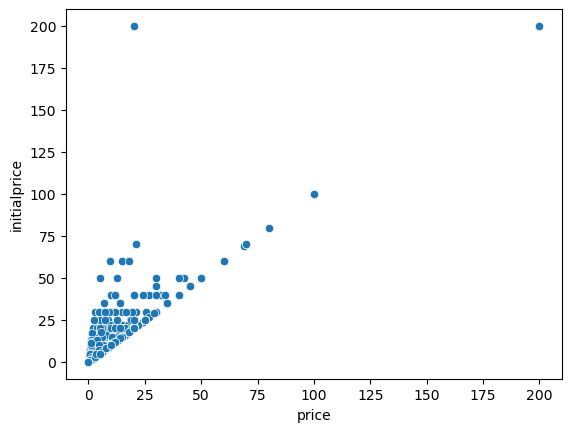

In [33]:
temp = raw[raw["Review"]=="Mixed"].loc[:, ["price","initialprice"]]
sns.scatterplot(temp, x="price", y ="initialprice")

<Axes: ylabel='Frequency'>

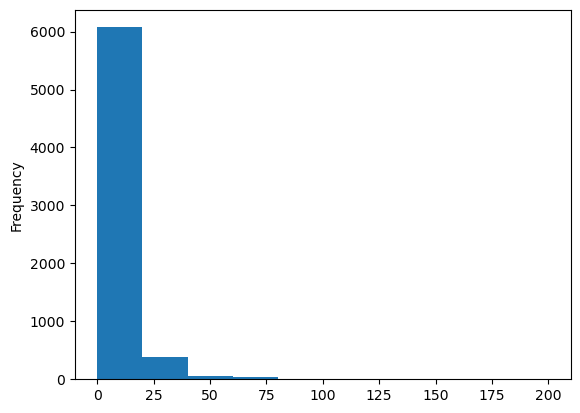

In [34]:
temp["initialprice"].plot(kind="hist")

<Axes: ylabel='Frequency'>

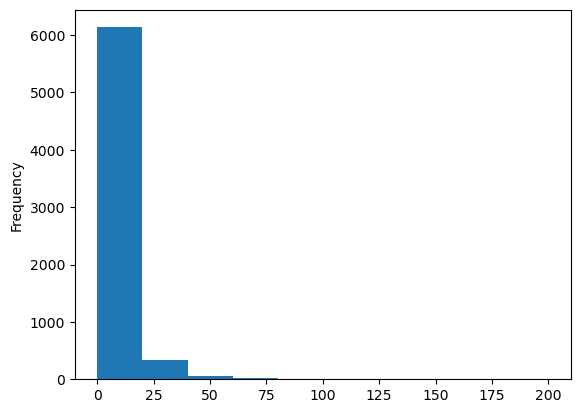

In [35]:
temp["price"].plot(kind="hist")

<Axes: xlabel='price', ylabel='initialprice'>

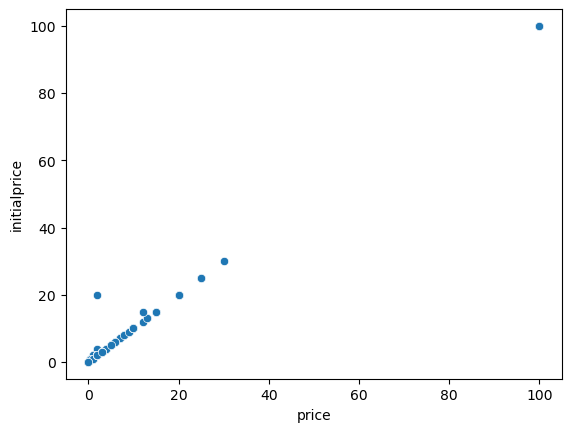

In [36]:
temp = raw[raw["Review"]=="Negative"].loc[:, ["price","initialprice"]]
sns.scatterplot(temp, x="price", y ="initialprice")

<Axes: ylabel='Frequency'>

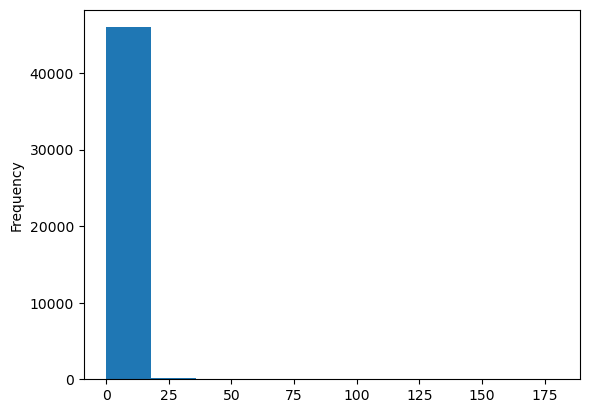

In [37]:
raw["gap_price"] = raw["initialprice"] - raw["price"]
raw["gap_price"].plot(kind="hist")

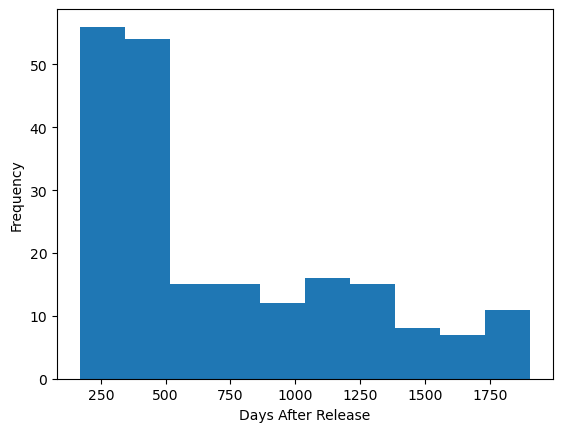

In [38]:
raw[raw["gap_price"] > 20]["days_after_release"].plot(kind="hist")
plt.xlabel("Days After Release")
plt.show()

C:\Users\NT550009\AppData\Local\Temp\ipykernel_17276\781090696.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"].plot(kind="hist")


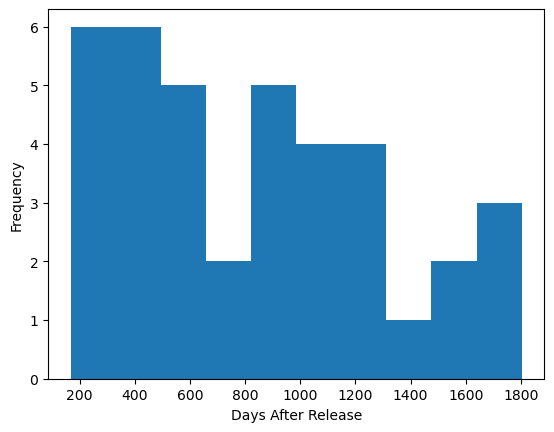

In [39]:
raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"].plot(kind="hist")
plt.xlabel("Days After Release")
plt.show()

C:\Users\NT550009\AppData\Local\Temp\ipykernel_17276\1328476026.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"].plot(kind="hist")


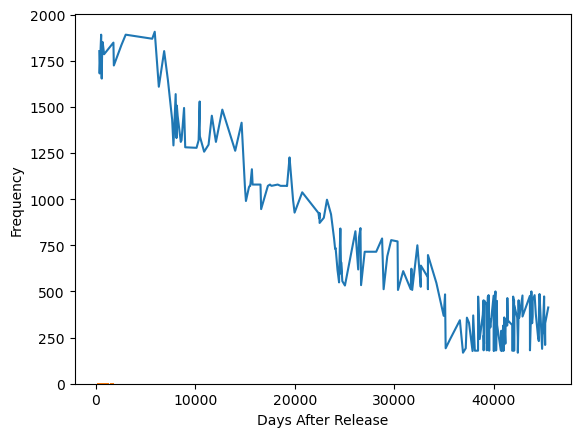

In [40]:
raw[raw["gap_price"] > 20]["days_after_release"].plot(kind="line")
raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"].plot(kind="hist")
plt.xlabel("Days After Release")
plt.show()

C:\Users\NT550009\AppData\Local\Temp\ipykernel_17276\907015652.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"], label="Histogram")


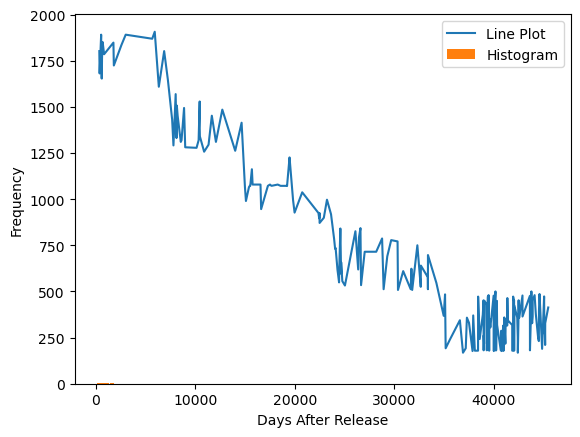

In [41]:
# 그래프 그리기
plt.plot(raw[raw["gap_price"] > 20]["days_after_release"], label="Line Plot")
plt.hist(raw[raw["Review"] == "Mixed"][raw["gap_price"] > 20]["days_after_release"], label="Histogram")

# 축 레이블 설정
plt.xlabel("Days After Release")
plt.ylabel("Frequency")

# 범례 표시
plt.legend()

plt.show()

# 3. changed to FTP : initial price 바뀜

In [42]:
raw.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative',
       'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks',
       'price', 'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic', 'metacritic_tf', 'windows',
       'mac', 'linux', 'platforms_num', 'recommendations', 'achievements',
       'new_date', 'days_after_release', 'Review', 'Review_group',
       'gap_price'],
      dtype='object')

In [45]:
raw[raw["is_free"] == 1]

,appid,24_Hour_Peak,All_time_peak,positive,negative,average_forever,average_2weeks,median_forever,median_2weeks,price,...,mac,linux,platforms_num,recommendations,achievements,new_date,days_after_release,Review,Review_group,gap_price
14,909080,140,1828,7688,206,161,0,106,0,0.0,...,1.0,0.0,2.0,901.0,28.0,2018-09-20,1702,Overwhelmingly Positive,positive,0.0
16,871720,293,11094,44581,2093,215,7,56,11,0.0,...,0.0,0.0,1.0,0.0,0.0,2018-06-27,1787,Very Positive,positive,0.0
26,897330,620,1535,5814,214,1469,32,234,32,0.0,...,1.0,1.0,3.0,0.0,1379.0,2018-08-17,1736,Very Positive,positive,0.0
31,714010,4557,10354,79517,4815,434,59,51,32,0.0,...,0.0,0.0,1.0,176.0,100.0,2018-02-07,1927,Very Positive,positive,0.0
34,788770,11,346,4043,151,29,0,26,0,0.0,...,1.0,0.0,2.0,0.0,0.0,2018-02-26,1908,Very Positive,positive,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46188,1929650,0,0,1,7,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,2022-03-24,421,8 user reviews,indifferent,0.0
46206,2099190,0,0,0,4,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,2022-08-27,265,4 user reviews,indifferent,0.0
46213,2011070,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,10.0,2022-06-15,338,Mostly Negative,negative,0.0
46215,1895230,0,0,1,9,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,2022-02-15,458,Negative,negative,0.0


In [48]:
raw["initialprice"] != 0

0         True
1         True
2         True
3         True
4         True
         ...  
46247     True
46248     True
46249    False
46250     True
46251     True
Name: initialprice, Length: 46252, dtype: bool

In [71]:
raw.is_free.unique()

array([0, 1], dtype=int64)

In [73]:
len(raw.initialprice.unique())

179

In [62]:
len(raw[(raw["is_free"] == 1)&(raw["initialprice"] == 0)])

8521

In [76]:
tmp=raw[(raw["is_free"] == 1)]
tmp.initialprice.value_counts()

0.0    8521
Name: initialprice, dtype: int64

# 4. correlation : recommendation, 24_Hour_Peak, All_time_peak

In [85]:
raw.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative',
       'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks',
       'price', 'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic', 'metacritic_tf', 'windows',
       'mac', 'linux', 'platforms_num', 'recommendations', 'achievements',
       'new_date', 'days_after_release', 'Review', 'Review_group',
       'gap_price'],
      dtype='object')

In [86]:

selected_columns = ['24_Hour_Peak', 'All_time_peak','platforms_num', 'recommendations', 'achievements', 
                    'days_after_release', 'Review', 'Review_group', 'gap_price']
selected_raw = raw[selected_columns].copy()


C:\Users\NT550009\AppData\Local\Temp\ipykernel_17276\3974931479.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = selected_raw.corr()


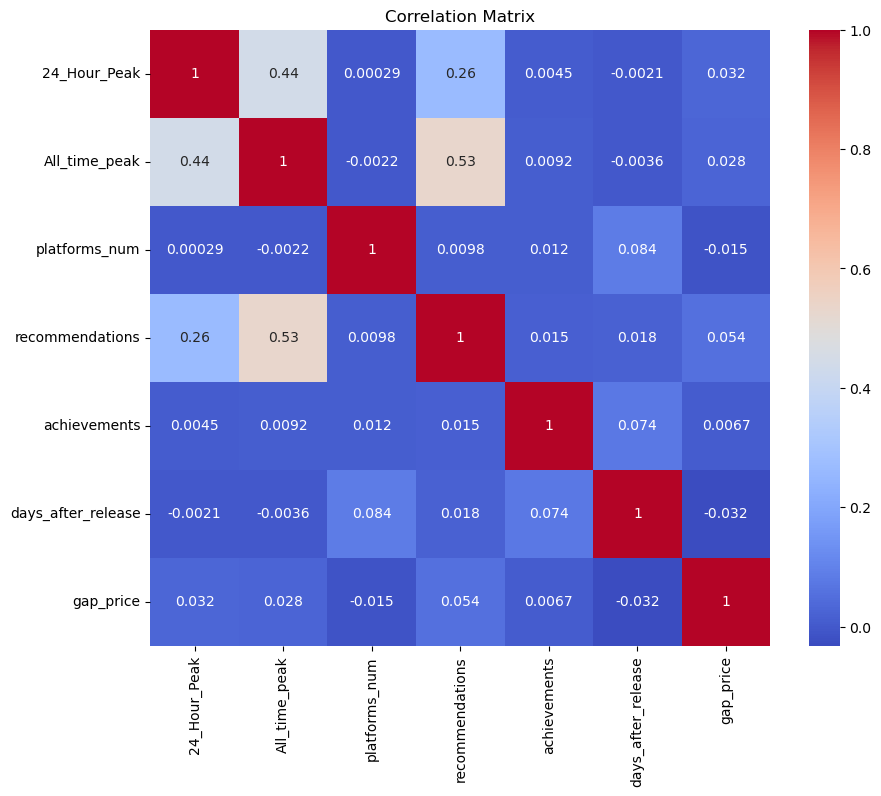

In [88]:
# 상관관계 계산
corr_matrix = selected_raw.corr()

# 그래프 출력
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()